In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab datasets/06. remaining_behavior_ext.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 34562 rows and 12 columns.


In [ ]:
df.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,34562.000000,34557.000000,34557.000000,34562.000000,3.456200e+04,34562.000000,34562.000000,34562.000000
mean,17280.500000,20.503248,0.444269,65.281684,2.949855e+04,9.874689,3.604913,15.477548
std,9977.334338,77.836489,0.302218,152.026311,7.973480e+04,64.937144,10.501039,15.359834
min,0.000000,0.000000,0.000714,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,8640.250000,0.372385,0.191011,6.666667,5.280000e+02,1.000000,1.000000,5.000000
50%,17280.500000,2.185226,0.384615,15.000000,5.901000e+03,1.000000,1.000000,10.000000
75%,25920.750000,9.435875,0.666667,58.000000,2.493900e+04,3.000000,2.000000,21.000000
max,34561.000000,2333.627333,1.000000,2800.000000,2.787530e+06,1462.000000,219.000000,178.000000


In [ ]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [ ]:
missing_values

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
1117,1117,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
1360,1360,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E
1776,1776,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
10718,10718,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
12348,12348,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E


In [ ]:
mean_df = df.copy()

In [ ]:
mean_df = mean_df.fillna(mean_df.mean())

In [ ]:
mean_df[pd.isnull(mean_df).any(axis=1)]

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source


In [ ]:
#lebelencoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Converting categorical variable to numerical labels
le = LabelEncoder()
df['ip_type'] = le.fit_transform(df['ip_type'])
df['behavior'] = le.fit_transform(df['behavior'])
df['behavior_type'] = le.fit_transform(df['behavior_type'])
df['source'] = le.fit_transform(df['source'])
print(df)

       Unnamed: 0  inter_api_access_duration(sec)  api_access_uniqueness  \
0               0                        7.010387               0.419355   
1               1                       51.419393               0.252336   
2               2                       25.860775               0.275000   
3               3                        0.205909               0.818182   
4               4                        0.122125               0.812500   
...           ...                             ...                    ...   
34557       34557                        0.030952               0.016275   
34558       34558                        2.300500               0.300000   
34559       34559                        0.393229               0.044610   
34560       34560                        0.394731               0.166667   
34561       34561                       11.825600               0.800000   

       sequence_length(count)  vsession_duration(min)  ip_type  behavior  \
0          

In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
df.head(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,0.419355,31.0,13040,1,74,3,1.0,1.0,13.0,0
1,51.419393,0.252336,107.0,330113,1,74,3,1.0,1.0,27.0,0
2,25.860775,0.275000,40.0,62066,1,74,3,1.0,1.0,11.0,0
3,0.205909,0.818182,11.0,136,1,74,3,1.0,1.0,9.0,0
4,0.122125,0.812500,16.0,118,1,74,3,1.0,1.0,13.0,0
5,0.100778,0.238095,63.0,381,0,74,3,3.0,1.0,15.0,0
6,15.326789,0.684211,19.0,17473,1,74,3,1.0,1.0,13.0,0
7,0.401190,0.134111,343.0,8257,1,74,3,2.0,1.0,46.0,0
8,15.913862,0.077586,11.6,110761,1,40,1,57.0,10.0,9.0,0
9,0.005437,0.250000,2.0,3,3,55,1,4.0,4.0,2.0,0


## **Finding outliers**

# **Histograms**

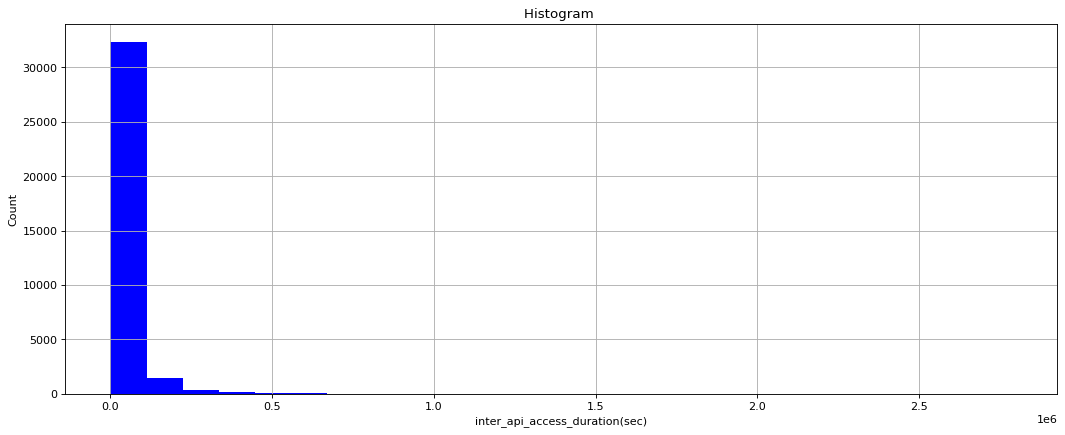

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)

# the histogram of the data
plt.hist(df['vsession_duration(min)'],25, facecolor='b')

plt.xlabel('inter_api_access_duration(sec)')
plt.ylabel('Count')
plt.title('Histogram ')
plt.grid(True)
plt.show()

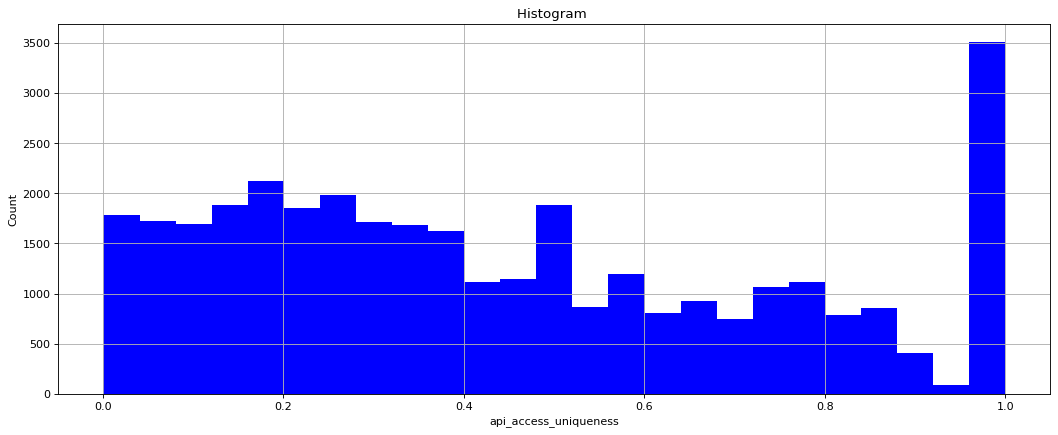

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)

# the histogram of the data
plt.hist(df['api_access_uniqueness'],25, facecolor='b')

plt.xlabel('api_access_uniqueness')
plt.ylabel('Count')
plt.title('Histogram ')
plt.grid(True)
plt.show()

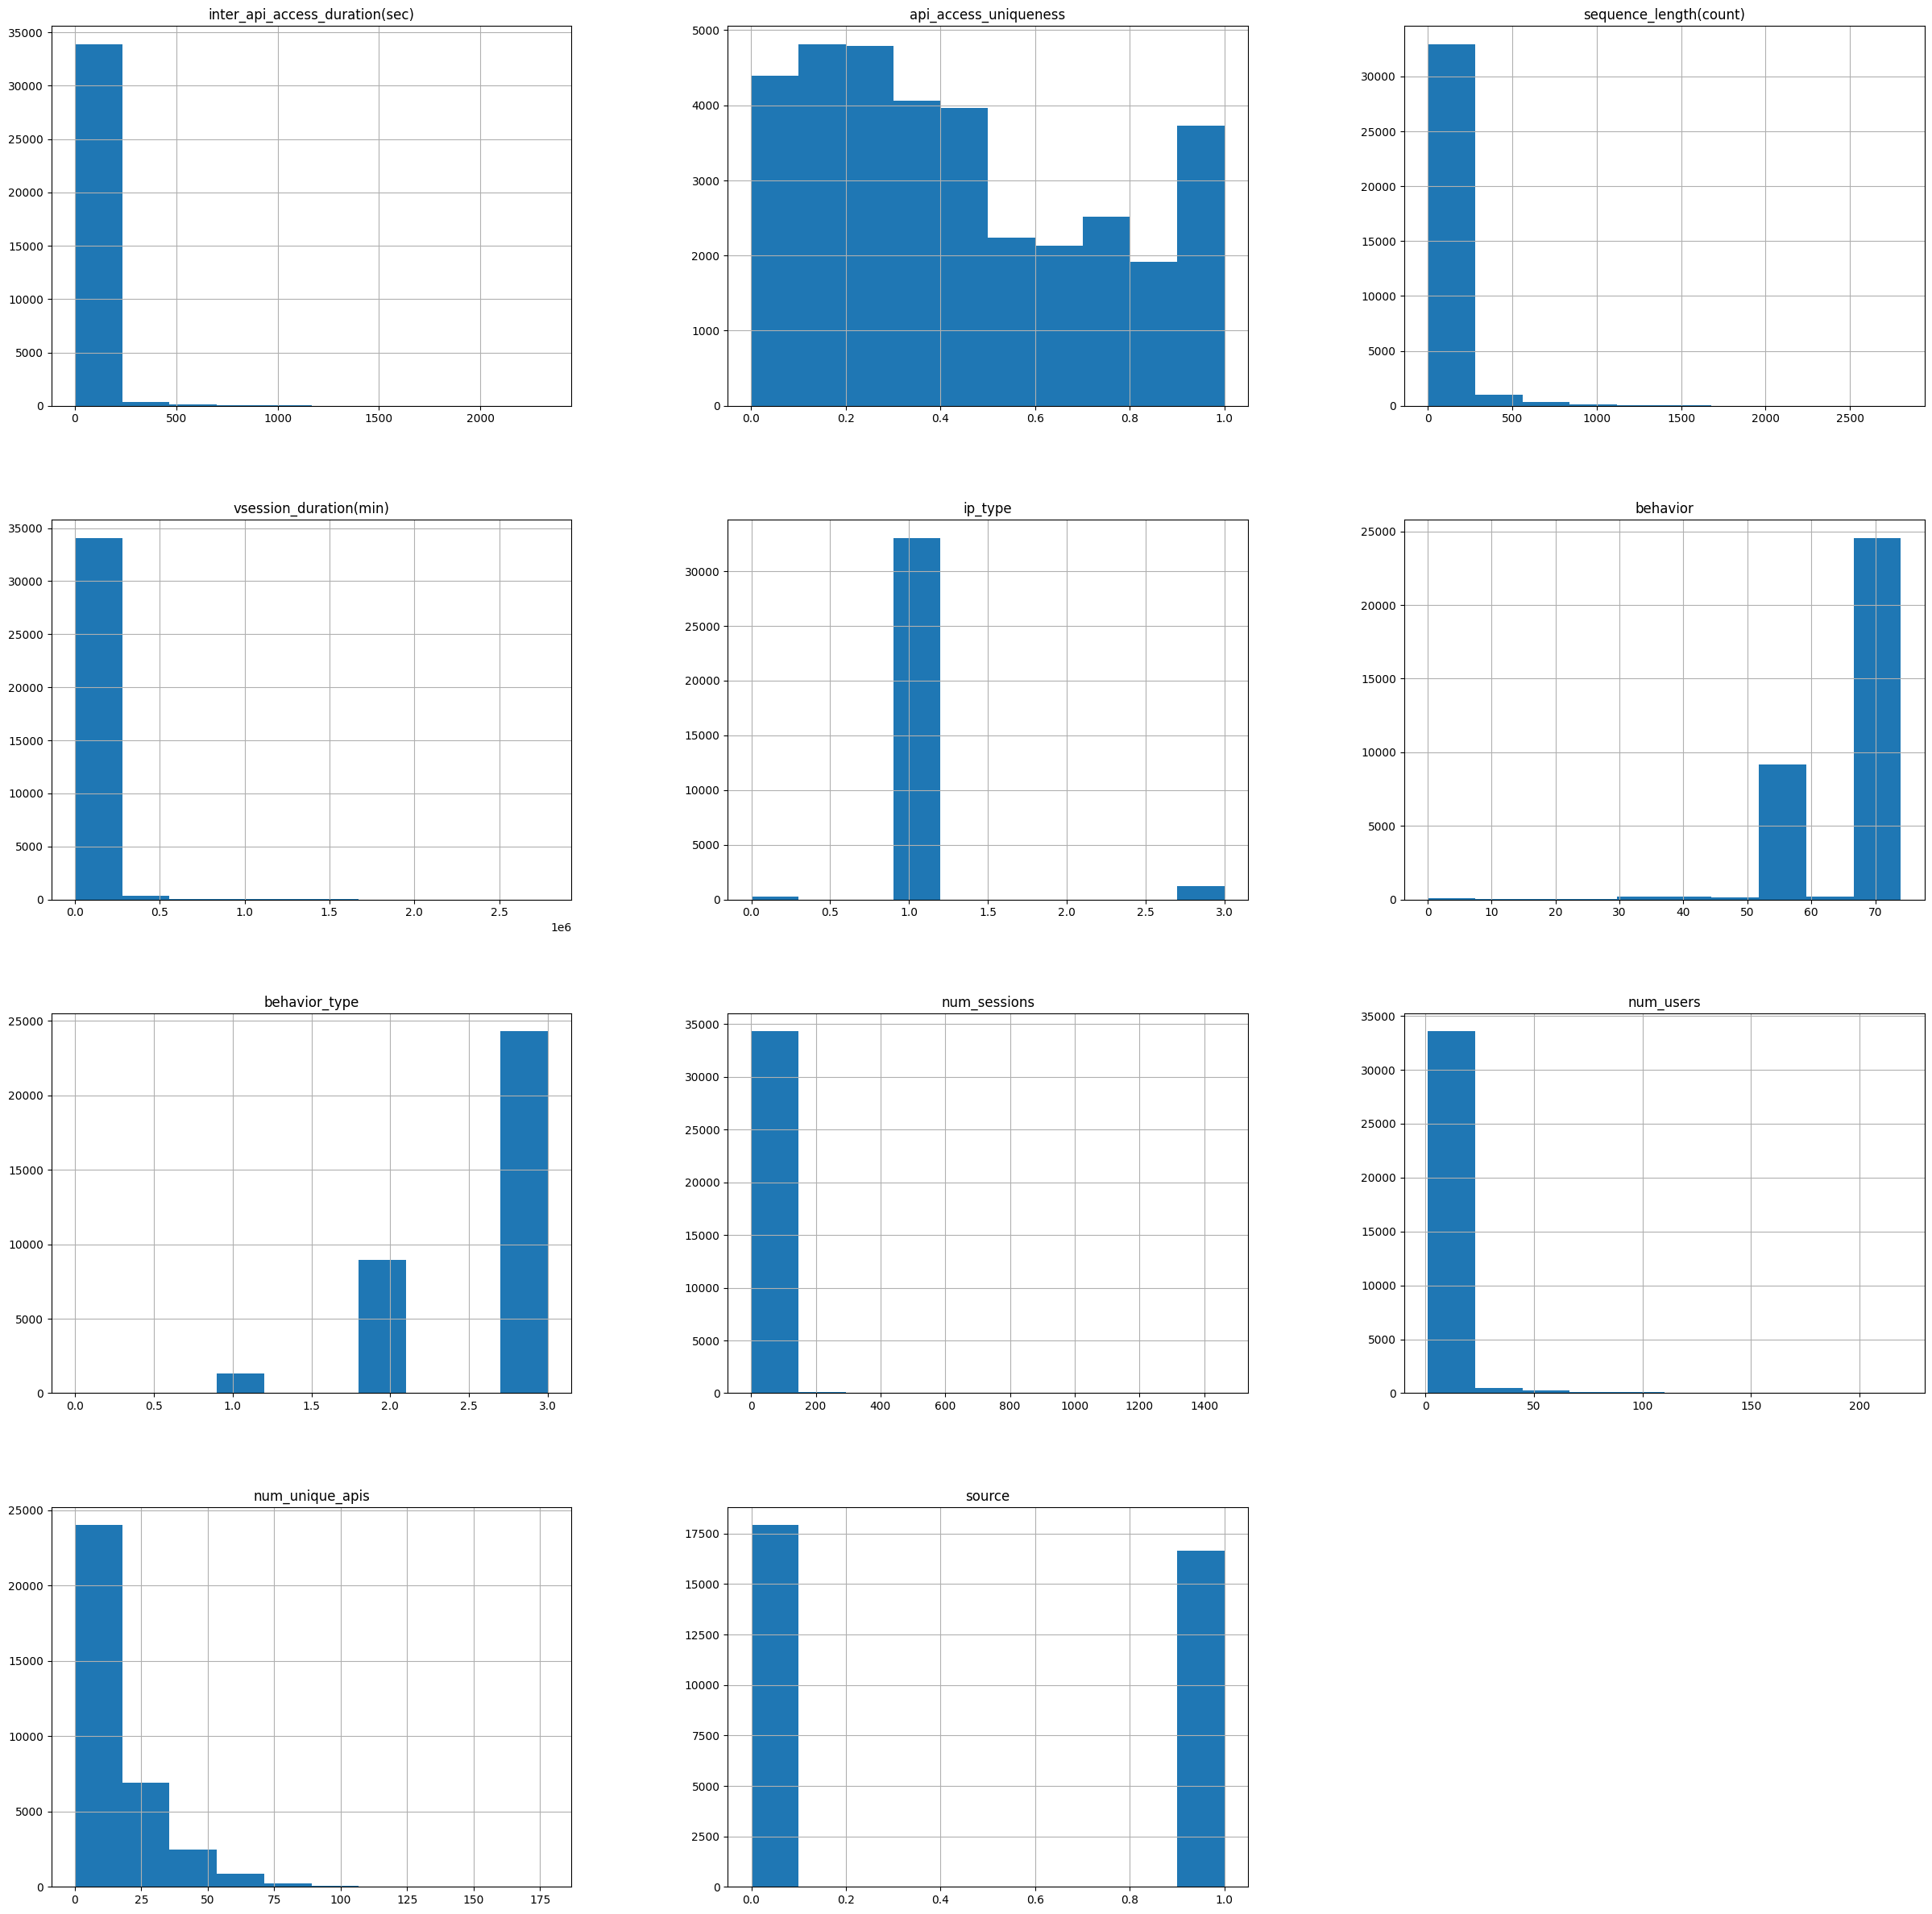

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace the column names with your actual column names

columns_to_plot = ['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'behavior', 'behavior_type',
                   'num_sessions', 'num_users', 'num_unique_apis', 'source']

# Plot histograms for each column
df[columns_to_plot].hist(figsize=(30, 30))
plt.show()

# **Scatterplots**

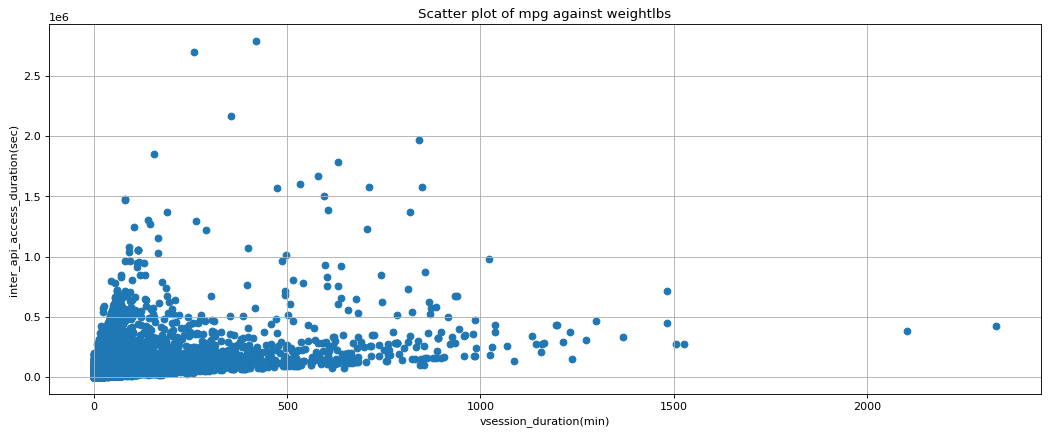

In [ ]:
figure(figsize=(16, 6), dpi=80)

plt.scatter(df['inter_api_access_duration(sec)'], df['vsession_duration(min)'])

plt.xlabel('vsession_duration(min)')
plt.ylabel('inter_api_access_duration(sec)')

plt.title('Scatter plot of mpg against weightlbs')

plt.grid(True)
plt.show()

# **Data Transformation**

# **Min-Max Normalization**

In [ ]:
df['inter_api_access_duration(sec)'].describe()

count    34557.000000
mean        20.503248
std         77.836489
min          0.000000
25%          0.372385
50%          2.185226
75%          9.435875
max       2333.627333
Name: inter_api_access_duration(sec), dtype: float64

In [ ]:
normalized_df = df.copy()

normalized_df['inter_api_access_duration(sec)']=(df['inter_api_access_duration(sec)']-df['inter_api_access_duration(sec)'].min())/(df['inter_api_access_duration(sec)'].max()-df['inter_api_access_duration(sec)'].min())

In [ ]:
normalized_df['inter_api_access_duration(sec)'].describe()

count    34557.000000
mean         0.008786
std          0.033354
min          0.000000
25%          0.000160
50%          0.000936
75%          0.004043
max          1.000000
Name: inter_api_access_duration(sec), dtype: float64

In [ ]:
normalized_df = df.copy()

normalized_df['api_access_uniqueness']=(df['api_access_uniqueness']-df['api_access_uniqueness'].min())/(df['api_access_uniqueness'].max()-df['api_access_uniqueness'].min())

In [ ]:
normalized_df['api_access_uniqueness'].describe()

count    34557.000000
mean         0.443872
std          0.302434
min          0.000000
25%          0.190433
50%          0.384176
75%          0.666428
max          1.000000
Name: api_access_uniqueness, dtype: float64

In [ ]:
df['sequence_length(count)'].describe()

count    34562.000000
mean        65.281684
std        152.026311
min          0.000000
25%          6.666667
50%         15.000000
75%         58.000000
max       2800.000000
Name: sequence_length(count), dtype: float64

In [ ]:
normalized_df = df.copy()

normalized_df['sequence_length(count)']=(df['sequence_length(count)']-df['sequence_length(count)'].min())/(df['sequence_length(count)'].max()-df['sequence_length(count)'].min())

In [ ]:
normalized_df['sequence_length(count)'].describe()

count    34562.000000
mean         0.023315
std          0.054295
min          0.000000
25%          0.002381
50%          0.005357
75%          0.020714
max          1.000000
Name: sequence_length(count), dtype: float64

In [ ]:
df['vsession_duration(min)'].describe()

count    3.456200e+04
mean     2.949855e+04
std      7.973480e+04
min      0.000000e+00
25%      5.280000e+02
50%      5.901000e+03
75%      2.493900e+04
max      2.787530e+06
Name: vsession_duration(min), dtype: float64

In [ ]:
normalized_df = df.copy()

normalized_df['vsession_duration(min)']=(df['vsession_duration(min)']-df['vsession_duration(min)'].min())/(df['vsession_duration(min)'].max()-df['vsession_duration(min)'].min())

In [ ]:
normalized_df['vsession_duration(min)'].describe()

count    34562.000000
mean         0.010582
std          0.028604
min          0.000000
25%          0.000189
50%          0.002117
75%          0.008947
max          1.000000
Name: vsession_duration(min), dtype: float64

# **Z-score normalization**

In [ ]:
standardized_df = df.copy()

standardized_df['inter_api_access_duration(sec)']=(df['inter_api_access_duration(sec)']-df['inter_api_access_duration(sec)'].mean())/(df['inter_api_access_duration(sec)'].std())

In [ ]:
standardized_df['inter_api_access_duration(sec)'].describe()

count    3.455700e+04
mean     2.385131e-17
std      1.000000e+00
min     -2.634144e-01
25%     -2.586302e-01
50%     -2.353398e-01
75%     -1.421875e-01
max      2.971773e+01
Name: inter_api_access_duration(sec), dtype: float64

In [ ]:
standardized_df = df.copy()

standardized_df['api_access_uniqueness']=(df['api_access_uniqueness']-df['api_access_uniqueness'].mean())/(df['api_access_uniqueness'].std())

In [ ]:
standardized_df['api_access_uniqueness'].describe()

count    3.455700e+04
mean    -7.566621e-17
std      1.000000e+00
min     -1.467665e+00
25%     -8.379970e-01
50%     -1.973863e-01
75%      7.358843e-01
max      1.838840e+00
Name: api_access_uniqueness, dtype: float64

In [ ]:
standardized_df = df.copy()

standardized_df['sequence_length(count)']=(df['sequence_length(count)']-df['sequence_length(count)'].mean())/(df['sequence_length(count)'].std())

In [ ]:
standardized_df['sequence_length(count)'].describe()

count    3.456200e+04
mean    -4.276167e-17
std      1.000000e+00
min     -4.294104e-01
25%     -3.855584e-01
50%     -3.307433e-01
75%     -4.789752e-02
max      1.798845e+01
Name: sequence_length(count), dtype: float64

In [ ]:
standardized_df = df.copy()

standardized_df['vsession_duration(min)']=(df['vsession_duration(min)']-df['vsession_duration(min)'].mean())/(df['vsession_duration(min)'].std())

In [ ]:
standardized_df['vsession_duration(min)'].describe()

count    3.456200e+04
mean     4.111699e-18
std      1.000000e+00
min     -3.699583e-01
25%     -3.633364e-01
50%     -2.959505e-01
75%     -5.718398e-02
max      3.459006e+01
Name: vsession_duration(min), dtype: float64

In [ ]:
standardized_df = df.copy()

standardized_df['num_unique_apis']=(df['num_unique_apis']-df['num_unique_apis'].mean())/(df['num_unique_apis'].std())

In [ ]:
standardized_df['num_unique_apis'].describe()

count    3.456200e+04
mean    -4.440635e-17
std      1.000000e+00
min     -1.007664e+00
25%     -6.821394e-01
50%     -3.566150e-01
75%      3.595385e-01
max      1.058100e+01
Name: num_unique_apis, dtype: float64

# **Interquartile Range**

In [ ]:
df['sequence_length(count)'].describe()

count    34562.000000
mean        65.281684
std        152.026311
min          0.000000
25%          6.666667
50%         15.000000
75%         58.000000
max       2800.000000
Name: sequence_length(count), dtype: float64

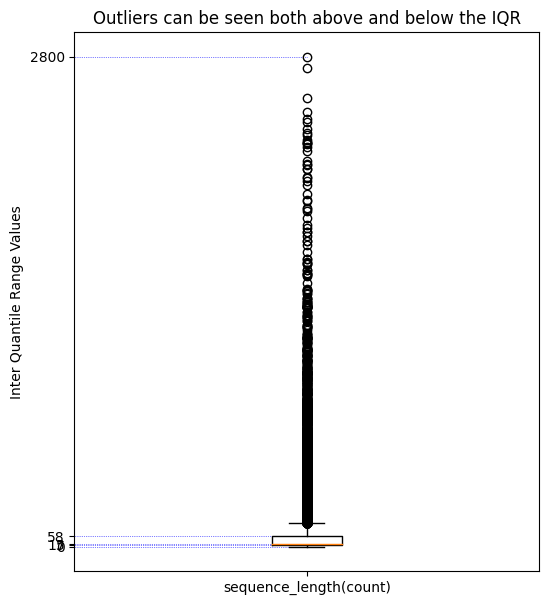

In [ ]:
import numpy as np
import matplotlib.pylab as plt


fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(df['sequence_length(count)'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['sequence_length(count)'])

quantiles = np.quantile(df['sequence_length(count)'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()

In [ ]:
df['vsession_duration(min)'].describe()

count    3.456200e+04
mean     2.949855e+04
std      7.973480e+04
min      0.000000e+00
25%      5.280000e+02
50%      5.901000e+03
75%      2.493900e+04
max      2.787530e+06
Name: vsession_duration(min), dtype: float64

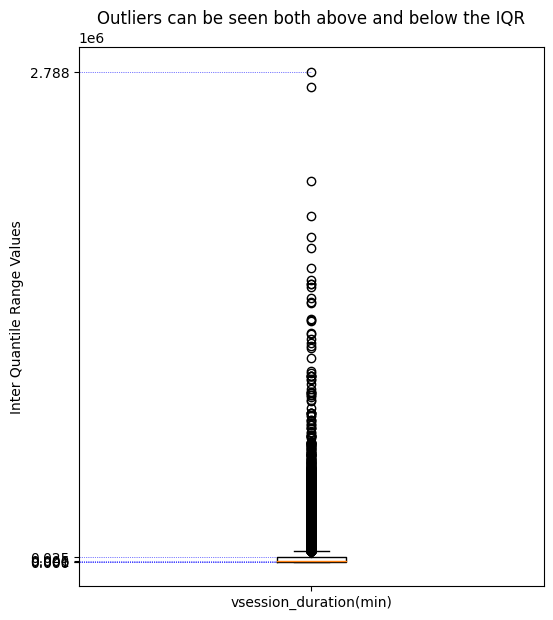

In [ ]:
import numpy as np
import matplotlib.pylab as plt


fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(df['vsession_duration(min)'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['vsession_duration(min)'])

quantiles = np.quantile(df['vsession_duration(min)'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()

In [ ]:
df['num_unique_apis'].describe()

count    34562.000000
mean        15.477548
std         15.359834
min          0.000000
25%          5.000000
50%         10.000000
75%         21.000000
max        178.000000
Name: num_unique_apis, dtype: float64

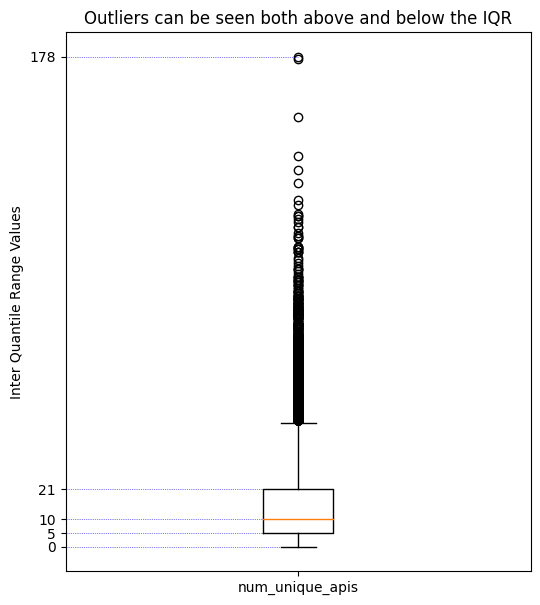

In [ ]:
import numpy as np
import matplotlib.pylab as plt


fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(df['num_unique_apis'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['num_unique_apis'])

quantiles = np.quantile(df['num_unique_apis'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace the column names with your actual column names

columns_to_normalize = ['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'behavior', 'behavior_type',
                   'num_sessions', 'num_users', 'num_unique_apis']

# Extract the specified columns for normalization
df_to_normalize = df[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max normalization
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=columns_to_normalize)

# Display the normalized DataFrame
print(df_normalized)

       inter_api_access_duration(sec)  api_access_uniqueness  \
0                            0.003004               0.418940   
1                            0.022034               0.251802   
2                            0.011082               0.274482   
3                            0.000088               0.818052   
4                            0.000052               0.812366   
...                               ...                    ...   
34557                        0.000013               0.015572   
34558                        0.000986               0.299500   
34559                        0.000169               0.043927   
34560                        0.000169               0.166071   
34561                        0.005067               0.799857   

       sequence_length(count)  vsession_duration(min)   ip_type  behavior  \
0                    0.011071                0.004678  0.333333  1.000000   
1                    0.038214                0.118425  0.333333  1.000000   


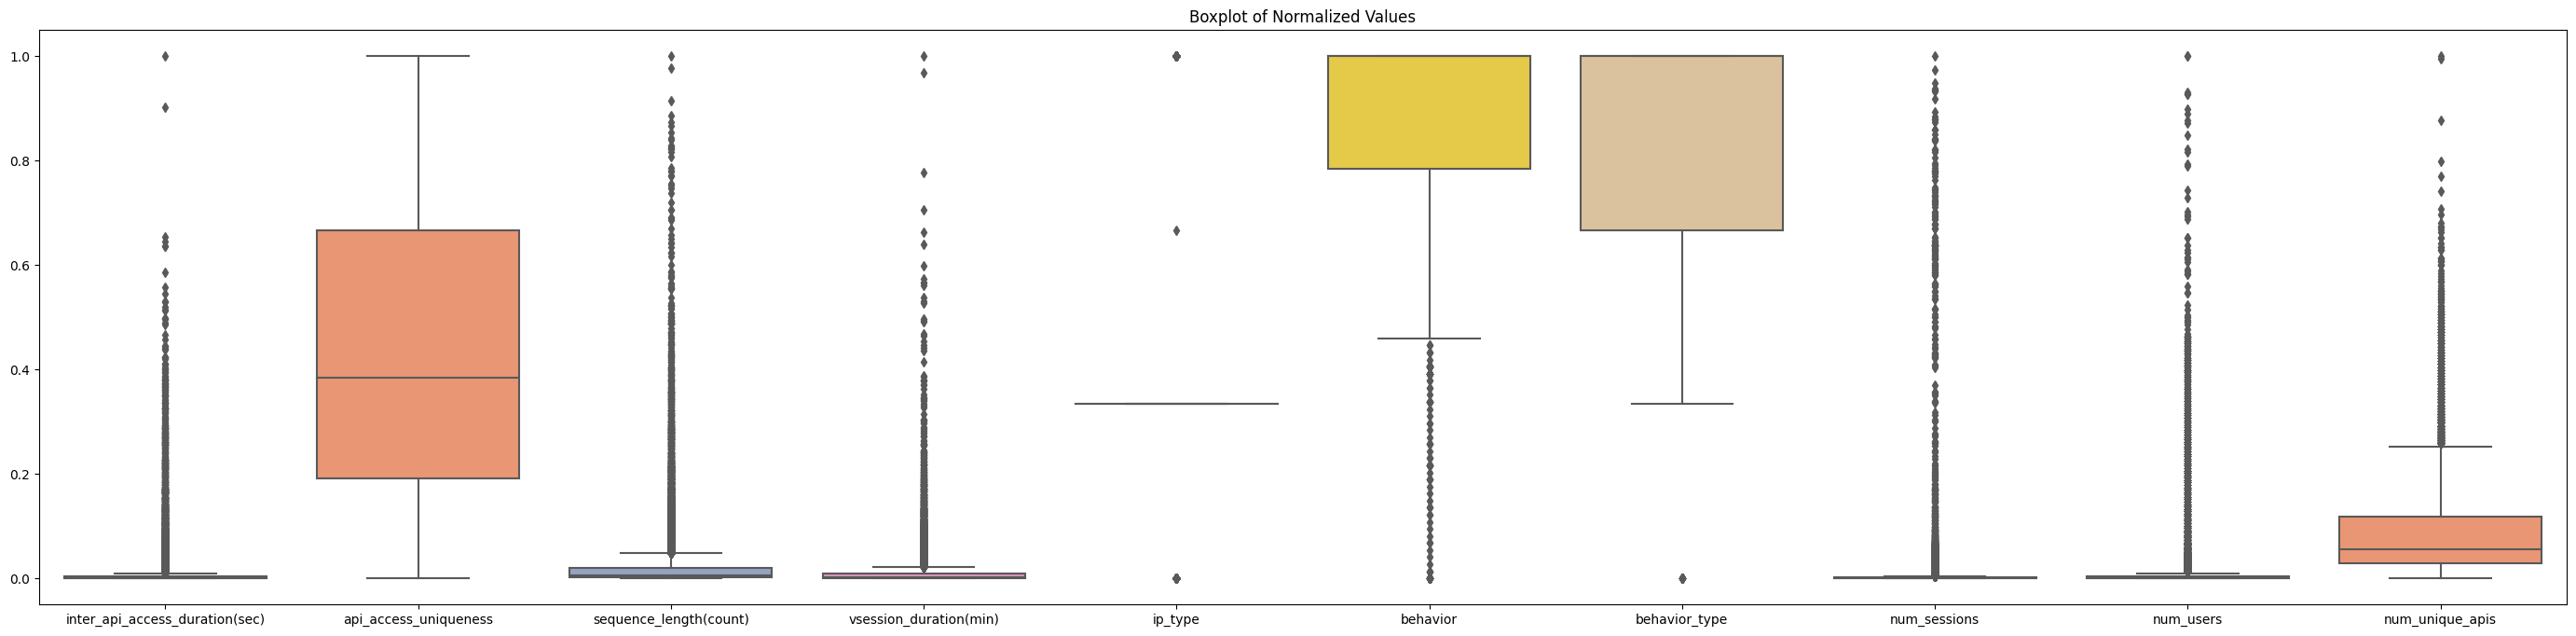

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

columns_to_normalize = ['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'behavior', 'behavior_type',
                   'num_sessions', 'num_users', 'num_unique_apis']

# Plot boxplot using Seaborn with color
plt.figure(figsize=(35, 8))
sns.boxplot(data=df_normalized, palette="Set2")
plt.title('Boxplot of Normalized Values')
plt.show()

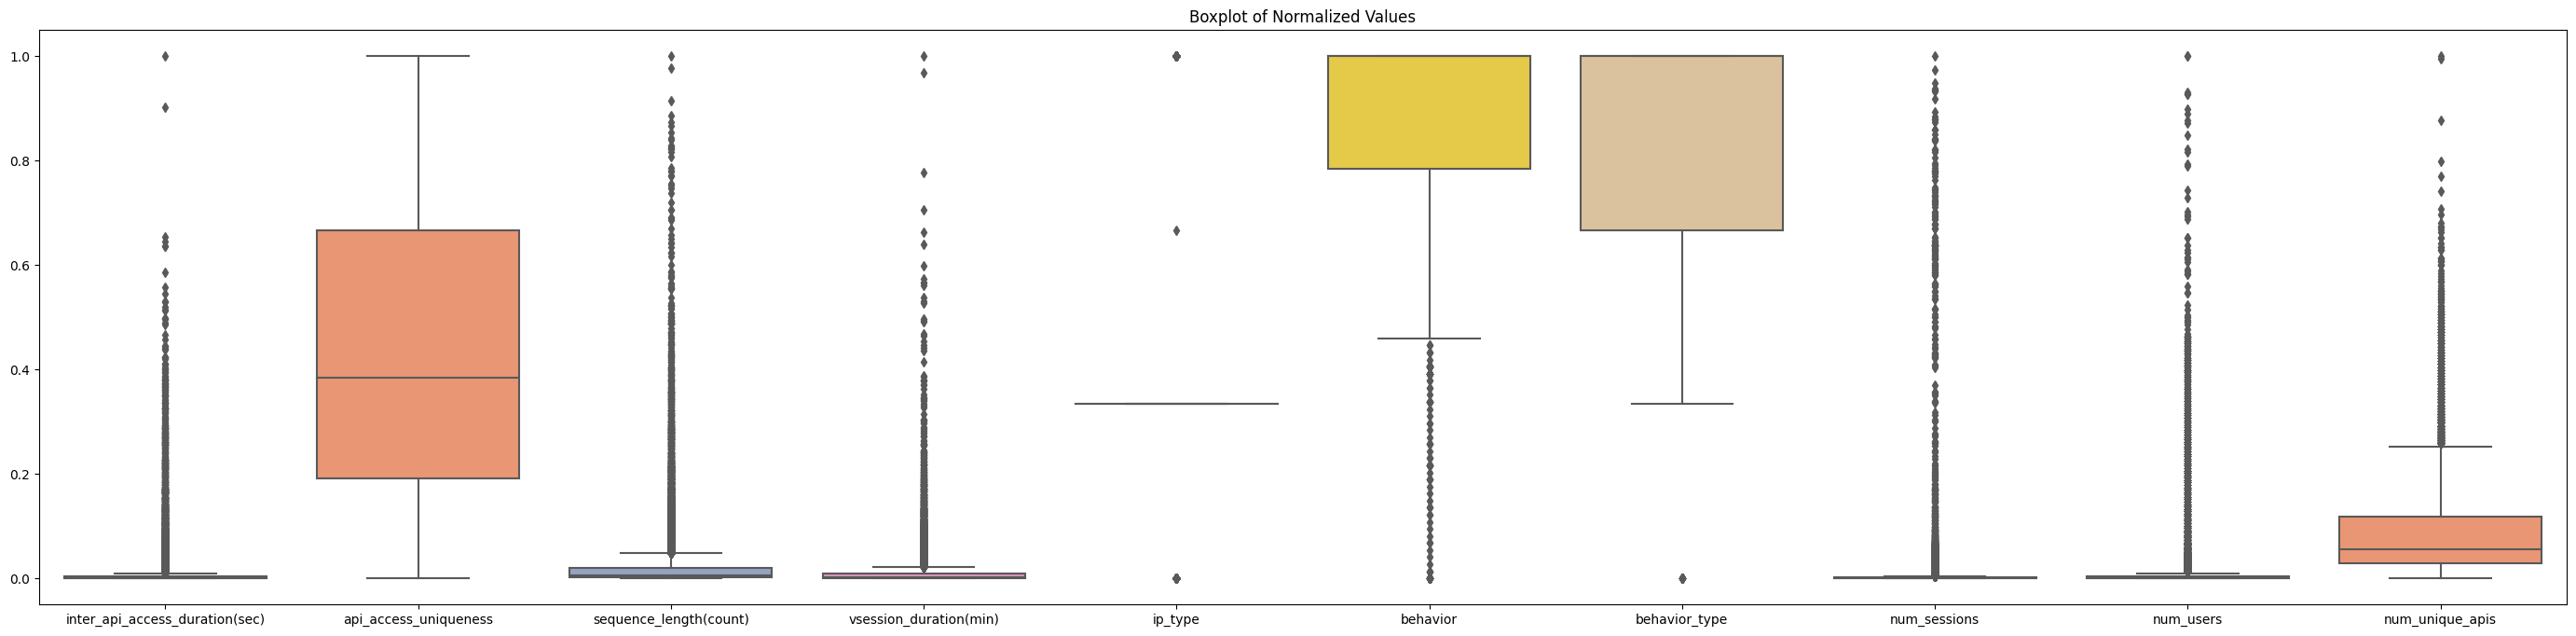

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

columns_to_normalize = ['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'behavior', 'behavior_type',
                   'num_sessions', 'num_users', 'num_unique_apis']

# Plot boxplot using Seaborn with color
plt.figure(figsize=(35, 8))
sns.boxplot(data=df_normalized, palette="Set2")
plt.title('Boxplot of Normalized Values')
plt.show()

# ***3. Exploratory Data Analysis***

In [ ]:
print(df.dtypes)

inter_api_access_duration(sec)    float64
api_access_uniqueness             float64
sequence_length(count)            float64
vsession_duration(min)              int64
ip_type                             int64
behavior                            int64
behavior_type                       int64
num_sessions                      float64
num_users                         float64
num_unique_apis                   float64
source                              int64
dtype: object


# **Co-related variables**

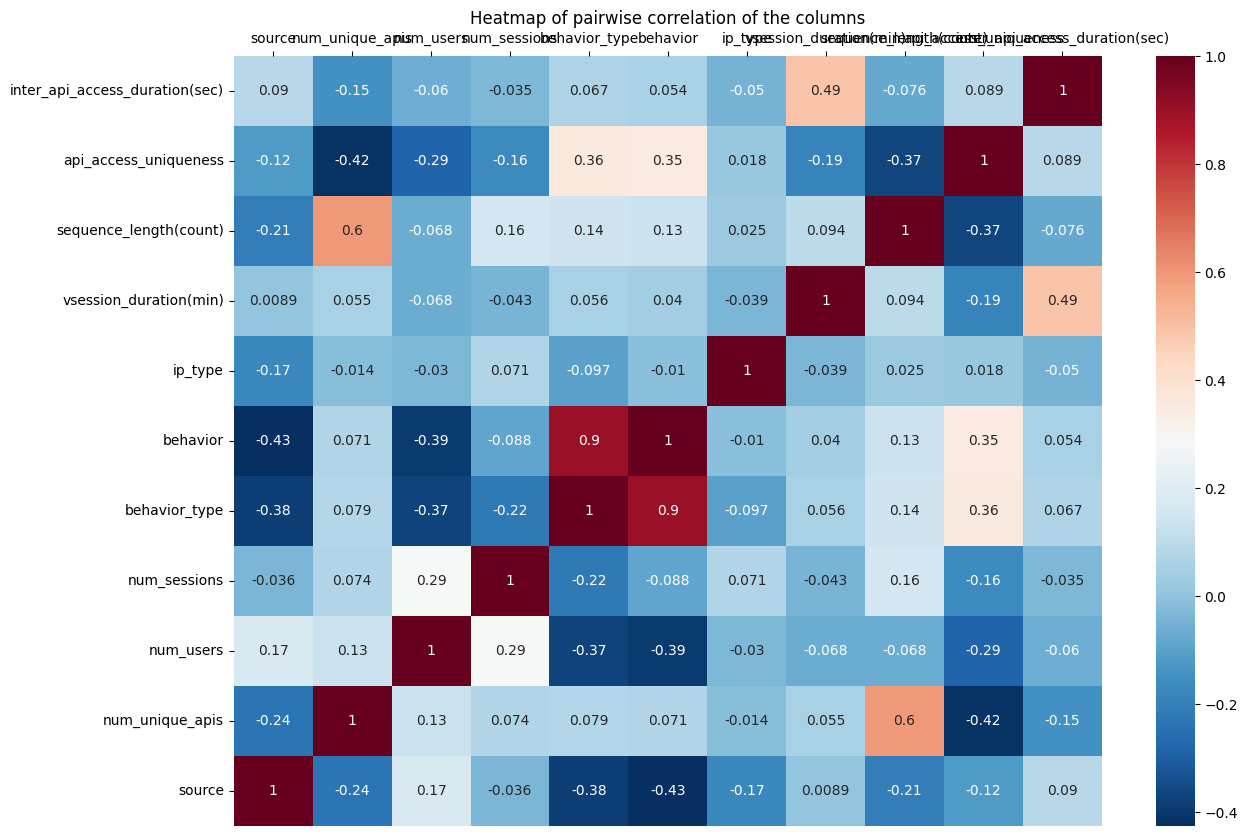

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(14, 10))

corr = df.corr()

ax = sns.heatmap(corr, cmap = "RdBu_r", annot=True)#in the figure  we want value

ax.invert_xaxis()

ax.xaxis.set_ticks_position('top')

plt.title("Heatmap of pairwise correlation of the columns")

plt.show()

# **Inference:     **

## **EXPLORING CATEGORICAL VARIABLES**



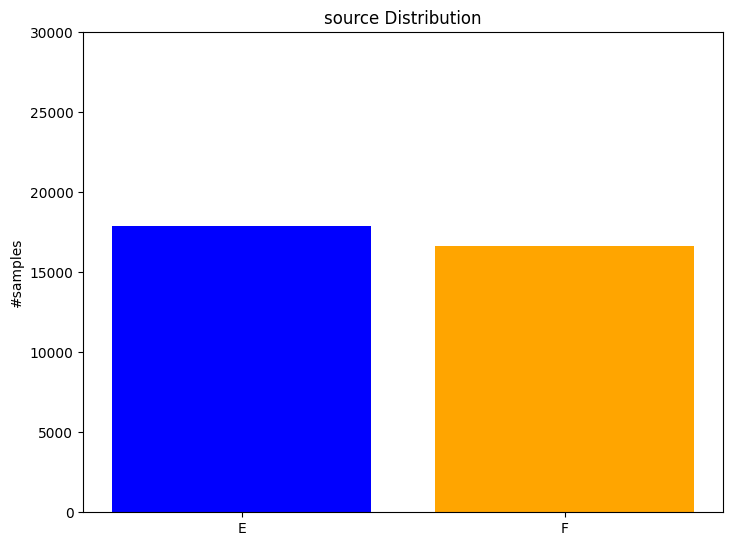

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

target = ['E', 'F']

hists = [len(df[df["source"] == 0]),len(df[df["source"] == 1])]#0=E,1=F
ax.bar(target,hists, color=['blue','orange'],)#target=x-axis, hists=y-axis

plt.title("source Distribution")
plt.ylabel('#samples')

plt.ylim(0,30000)

plt.show()

In [ ]:
financial_perc = df["source"].sum() * 100 / df["source"].shape[0]
print("Financial service percentage is %.3f%%." % financial_perc)


Financial service percentage is 48.157%.


### **Can you find a pattern?**

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
source_dict = {0: "E", 1: "F"}

ecommerce = df[df["source"] == 0]
financial_services = df[df["source"] == 1]

def create_ecommerce_trace(col, visible=False):
    return go.Histogram(
        x=ecommerce[col],
        name='ecommerce',
        marker = dict(color = colors[0]),
        visible=visible,
    )

def create_financial_services_trace(col, visible=False):
    return go.Histogram(
        x=financial_services[col],
        name='financial_services',
        marker = dict(color = colors[1]),
        visible = visible,
    )

features_not_for_hist = ["source"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]
active_idx = 0
traces_ecommerce = [(create_ecommerce_trace(col) if i != active_idx else create_ecommerce_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_financial_services = [(create_financial_services_trace(col) if i != active_idx else create_financial_services_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_ecommerce + traces_financial_services

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

## **Distribution Box Plots**



In [ ]:
configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

def create_box_ecommerce_trace(col, visible=False):
    return go.Box(
        y=ecommerce[col],
        name='ecommerce',
        marker = dict(color = colors[0]),
        visible=visible,
    )

def create_box_finacial_services_trace(col, visible=False):
    return go.Box(
        y=financial_services[col],
        name='financial_services',
        marker = dict(color = colors[1]),
        visible = visible,
    )

features_not_for_hist = [""]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(ecommerce[col].unique())>5]

active_idx = 0
box_traces_ecommerce = [(create_box_ecommerce_trace(col) if i != active_idx else create_box_ecommerce_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_finacial_services = [(create_box_finacial_services_trace(col) if i != active_idx else create_box_finacial_services_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
data = box_traces_ecommerce + box_traces_finacial_services

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')

Output hidden; open in https://colab.research.google.com to view.

## **EXPLORING MULTIVARIATE RELATIONSHIPS - Scatter-plots**



### **2-D Scatterplots**

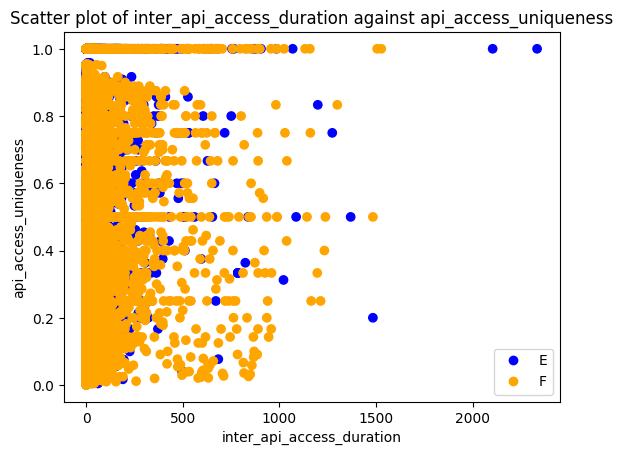

In [ ]:
import matplotlib
#figure(figsize=(10, 8), dpi=80)

label = [0,1]
colors = ['blue','orange']

scatter = plt.scatter(df['inter_api_access_duration(sec)'], df['api_access_uniqueness'], c=df['source'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('inter_api_access_duration')
plt.ylabel('api_access_uniqueness')
plt.title('Scatter plot of inter_api_access_duration against api_access_uniqueness')
plt.legend(handles=scatter.legend_elements()[0],
           labels=target)
plt.show()

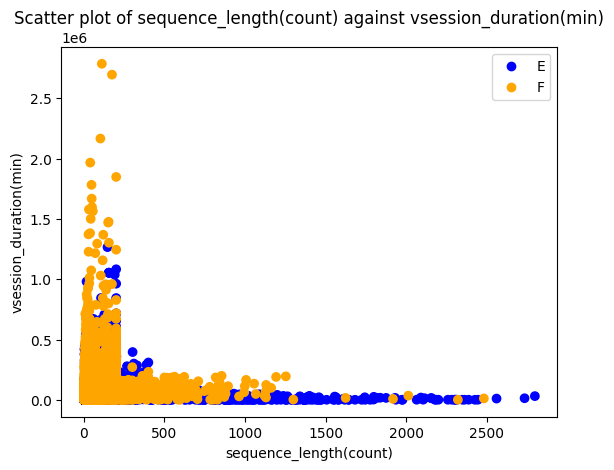

In [ ]:
import matplotlib
#figure(figsize=(10, 8), dpi=80)

label = [0,1]
colors = ['blue','orange']

scatter = plt.scatter(df['sequence_length(count)'], df['vsession_duration(min)'], c=df['source'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('sequence_length(count)')
plt.ylabel('vsession_duration(min)')
plt.title('Scatter plot of sequence_length(count) against vsession_duration(min)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=target)
plt.show()

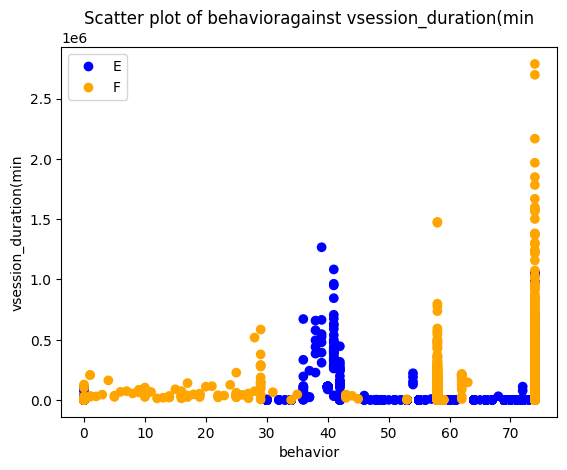

In [ ]:
import matplotlib
#figure(figsize=(10, 8), dpi=80)

label = [0,1]
colors = ['blue','orange']

scatter = plt.scatter(df['behavior'], df['vsession_duration(min)'], c=df['source'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('behavior')
plt.ylabel('vsession_duration(min')
plt.title('Scatter plot of behavioragainst vsession_duration(min')
plt.legend(handles=scatter.legend_elements()[0],
           labels=target)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# List of columns to be plotted (excluding 'veil-type')
columns_to_plot = ['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type',
                   'behavior', 'behavior_type', 'num_sessions', 'num_users',
                   'num_unique_apis', 'source']

# Colors for class labels
colors = {0: 'blue', 1: 'orange'}

# Create a legend for the scatter plot
label = ['Ecommerce', 'Financial services']

# Scatter plots for all combinations of columns
for col_x in columns_to_plot:
    for col_y in columns_to_plot:
        if col_x != col_y:
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(df[col_x], df[col_y], c=df['source'].map(colors))
            plt.xlabel(col_x)
            plt.ylabel(col_y)
            plt.title(f'Scatter plot of {col_x} against {col_y}')
            plt.legend(handles=scatter.legend_elements()[0], labels=label)
            plt.show()


Output hidden; open in https://colab.research.google.com to view.

## **Binning**

There are various strategies for binning numerical variables. One approach is to
make the classes of equal width, analogous to equal-width histograms. Another
approach is to try to equalize the number of records in each class. You may
consider yet another approach, which attempts to partition the data set into
identifiable groups of records, which, with respect to the target variable, have
behavior similar to that for other records in the same class.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

configure_plotly_browser_state()
init_notebook_mode(connected=False)  # to show plots in notebook

# List of columns to be plotted
columns_to_plot = ['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'ip_type',
                   'behavior', 'behavior_type',  'num_users',
                   'num_unique_apis']

# Colors for class labels
colors = {0: 'blue', 1: 'orange'}

# Binning parameters
num_bins = 20  # You can adjust the number of bins

# Subplots
fig = make_subplots(rows=1, cols=len(columns_to_plot), subplot_titles=columns_to_plot)

# Loop through each column and create histograms for both classes
for i, col in enumerate(columns_to_plot):
    trace_ecommerce = go.Histogram(
        x=ecommerce[col],
        name='ecommerce',
        marker=dict(color=colors[0]),
        xbins=dict(start=ecommerce[col].min(), end=ecommerce[col].max() + 1, size=num_bins),
        autobinx=False
    )

    trace_financial_services = go.Histogram(
        x=financial_services[col],
        name='financial_services',
        marker=dict(color=colors[1]),
        xbins=dict(start=financial_services[col].min(), end=financial_services[col].max() + 1, size=num_bins),
        autobinx=False
    )

    fig.add_trace(trace_ecommerce, row=1, col=i + 1)
    fig.add_trace(trace_financial_services, row=1, col=i + 1)

    # Update layout for each subplot
    fig.update_xaxes(title_text=f'Feature: {col}', row=1, col=i + 1)

# Update overall layout
fig.update_layout(height=400,width=1200, showlegend=True)

# Show the plot
iplot(fig, filename='histogram')

Output hidden; open in https://colab.research.google.com to view.